In [1]:
import matplotlib.pyplot as plt
from math import sin, cos, exp, log, sqrt

class DiffMath:
    """Class contains all derivative and error formulas"""
    
    def __init__(self):
        self.coeffs = [
        #   -3h -2h -h 0 h 2h 3h
            [0, 0, 0, -1, 1, 0, 0],
            [0, 0, -1, 1, 0, 0, 0],
            [0, 0, -1/2, 0, 1/2, 0, 0],
            [0, 1/12, -2/3, 0, 2/3, -1/12, 0],
            [-1/60, 3/20, -3/4, 0, 3/4, -3/20, 1/60]
        ]
    
    def get_derivative(self, num):
        def derivative(f, x, h):
            sum = 0
            for i in range(len(self.coeffs[num])):
                sum += self.coeffs[num][i] * f(x + h * (i - 3))
                
            return sum / h
        
        return derivative

    def get_derivative_count(self):
        return len(self.coeffs)
    
    def calc_derivative(self, f, x, h, num):
        return self.get_derivative(num)(f, x, h)
    
    @staticmethod
    def get_h_list(h_pow):
        return [1 / 2 ** (i - 1) for i in range(1, h_pow)]
    
    def get_error_list(self, f_init, f_deriv, x, num, h_pow):
        errors = []
        for h in self.get_h_list(h_pow):
            errors.append(abs(self.calc_derivative(f_init, x, h, num) - f_deriv(x)))
            
        return errors

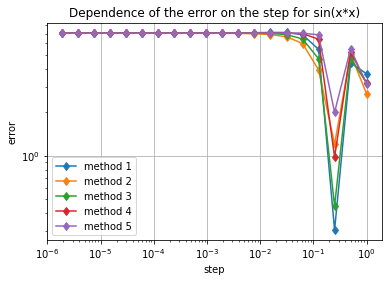

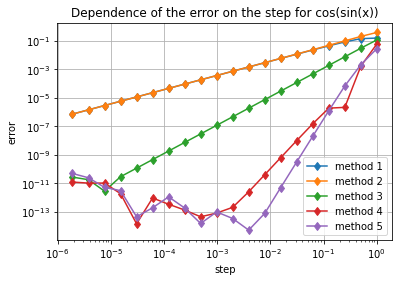

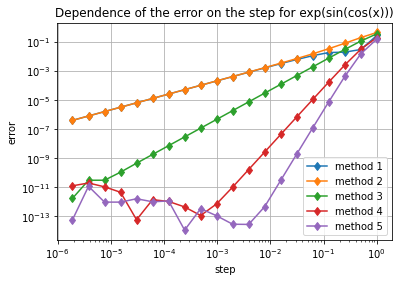

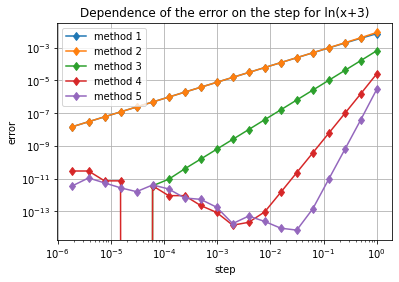

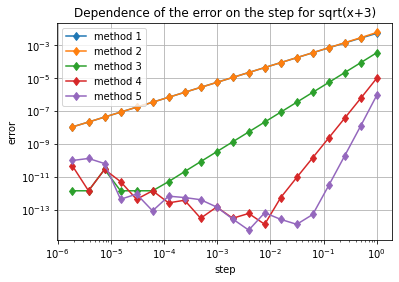

In [2]:
argument = 5
h_pow = 21
dm = DiffMath()

f1 = lambda x: sin(x * x)
f1_d = lambda x: 2 * x * cos(x)

f2 = lambda x: cos(sin(x))
f2_d = lambda x: -cos(x) * sin(sin(x))
    
f3 = lambda x: exp(sin(cos(x)))
f3_d = lambda x: -exp(sin(cos(x))) * cos(cos(x)) * sin(x)

f4 = lambda x: log(x + 3)
f4_d = lambda x: 1 / (x + 3)

f5 = lambda x: sqrt(x + 3)
f5_d = lambda x: 1 / (2 * sqrt(x + 3))

f_list = [f1, f2, f3, f4, f5]
f_deriv_list = [f1_d, f2_d, f3_d, f4_d, f5_d]
f_name = ['sin(x*x)', 'cos(sin(x))', 'exp(sin(cos(x)))', 'ln(x+3)', 'sqrt(x+3)']

x = dm.get_h_list(h_pow)

for i in range(len(f_list)):
    plot = plt.figure(num=f'Error for {f_name[i]}')
    for j in range(dm.get_derivative_count()):
        y = dm.get_error_list(f_list[i], f_deriv_list[i], argument, j, h_pow)
        plt.plot(x, y, marker='d', label=f'method {j+1}')

    plt.ylabel('error')
    plt.yscale('log')
    plt.xlabel('step')
    plt.xscale('log')
    plt.grid()
    plt.title(f'Dependence of the error on the step for {f_name[i]}')
    plt.legend()
             
plt.show()